In [158]:
import yfinance as yf
import numpy as np

In [159]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [160]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-08-20,59493.453125,61396.328125,58610.882812,59012.792969,59012.792969,31613400008
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914062,60381.914062,27625734377


In [161]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [162]:
def lagit(df, lags):
     names = []
     for i in range(1, lags + 1):
          df['Lag_' + str(i)] = df['returns'].shift(i)
          names.append('Lag_' + str(i))
     return df.dropna(), names

In [163]:
lagnames = lagit(df, 5)

In [164]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.074643,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.072402,-0.074643,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035111,-0.072402,-0.074643,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024968,0.035111,-0.072402,-0.074643,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,59493.453125,61396.328125,58610.882812,59012.792969,59012.792969,31613400008,-0.008112,0.017114,-0.016870,0.009882,0.022911,-0.020245
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072,0.035987,-0.008112,0.017114,-0.016870,0.009882,0.022911
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914062,60381.914062,27625734377,-0.013052,0.035987,-0.008112,0.017114,-0.016870,0.009882


In [165]:
df.dropna(inplace=True)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
model = LinearRegression()

In [168]:
# Ensure lagnames is a list of strings
lagnames = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

# Check if the DataFrame contains the columns specified in lagnames
missing_cols = [col for col in lagnames if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in DataFrame: {missing_cols}")

In [169]:
model.fit(df[lagnames], df['returns'])

LinearRegression()

In [170]:
df['prediction_LR'] = model.predict(df[lagnames])

In [171]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
Date,,,,,,,,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,0.080333,0.008317,-0.024968,0.035111,-0.072402,-0.074643,-0.000053
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,-0.029306,0.080333,0.008317,-0.024968,0.035111,-0.072402,-0.000965
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,-0.027868,-0.029306,0.080333,0.008317,-0.024968,0.035111,0.003088
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,-0.017523,-0.027868,-0.029306,0.080333,0.008317,-0.024968,0.002766
2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300,-0.012202,-0.017523,-0.027868,-0.029306,0.080333,0.008317,0.001999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,59493.453125,61396.328125,58610.882812,59012.792969,59012.792969,31613400008,-0.008112,0.017114,-0.016870,0.009882,0.022911,-0.020245,0.001026
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072,0.035987,-0.008112,0.017114,-0.016870,0.009882,0.022911,0.001803
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914062,60381.914062,27625734377,-0.013052,0.035987,-0.008112,0.017114,-0.016870,0.009882,0.000614


In [172]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [173]:
df['strat_LR'] = df['direction_LR'] * df['returns']    

In [174]:
np.exp(df[['returns', 'strat_LR']].sum())

returns     160.165708
strat_LR    765.195109
dtype: float64

<Axes: xlabel='Date'>

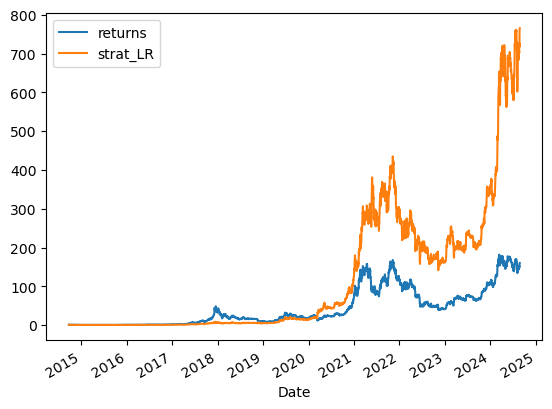

In [175]:
np.exp(df[['returns', 'strat_LR']].cumsum()).plot()

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
train,test = train_test_split(df, test_size=0.3, shuffle=False, random_state=0)

In [178]:
train = train.copy()

In [179]:
test = test.copy()  

In [180]:
model = LinearRegression()    

In [181]:
train

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,0.080333,0.008317,-0.024968,0.035111,-0.072402,-0.074643,-0.000053,-1,-0.080333
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,-0.029306,0.080333,0.008317,-0.024968,0.035111,-0.072402,-0.000965,-1,0.029306
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,-0.027868,-0.029306,0.080333,0.008317,-0.024968,0.035111,0.003088,1,-0.027868
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,-0.017523,-0.027868,-0.029306,0.080333,0.008317,-0.024968,0.002766,1,-0.017523
2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300,-0.012202,-0.017523,-0.027868,-0.029306,0.080333,0.008317,0.001999,1,-0.012202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,28568103401,-0.003190,0.044099,-0.042102,0.025960,-0.037845,0.004541,-0.000107,-1,0.003190
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,25889650240,-0.001485,-0.003190,0.044099,-0.042102,0.025960,-0.037845,0.001267,1,-0.001485
2021-08-30,48834.851562,48925.605469,46950.273438,47054.984375,47054.984375,31847007016,-0.037025,-0.001485,-0.003190,0.044099,-0.042102,0.025960,0.001780,1,-0.037025


In [182]:
model.fit(train[lagnames], train['returns'])

LinearRegression()

In [183]:
test['prediction_LR'] = model.predict(test[lagnames])

In [184]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [185]:
df['strat_LR'] = test['direction_LR'] * test['returns']

In [186]:
np.exp(test[['returns', 'strat_LR']].sum())

returns     1.318626
strat_LR    2.214155
dtype: float64

In [187]:
(test['direction_LR'].diff() != 0).value_counts() 

direction_LR
False    1013
True       75
Name: count, dtype: int64

<Axes: xlabel='Date'>

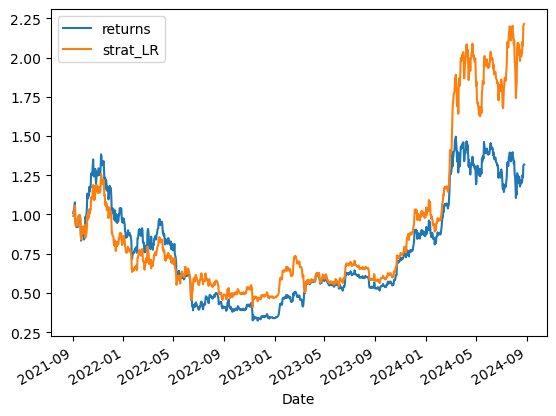

In [188]:
np.exp(test[['returns', 'strat_LR']].cumsum()).plot()